In [1]:
#Use Necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
df=pd.read_csv("dataset/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#Clustering for either x or y is enough
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
#or
y=df[["Annual Income (k$)","Age"]]

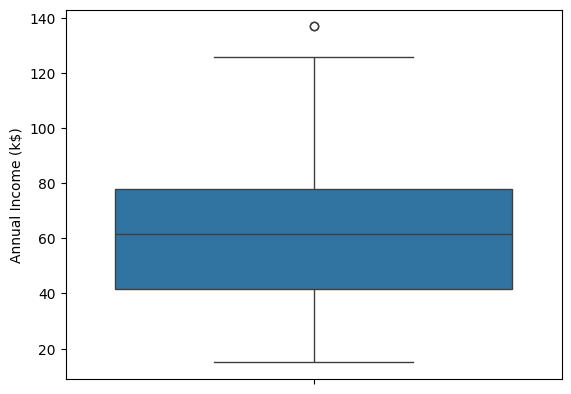

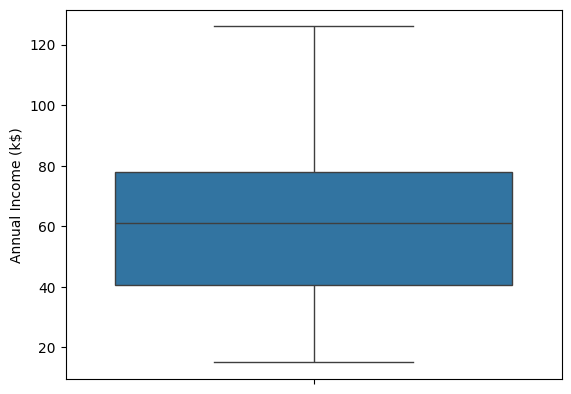

In [17]:
sns.boxplot(y='Annual Income (k$)',data=df)
plt.show()
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.80)
iqr=q3-q1
lw=q1-1.5*iqr
hw=q3+1.5*iqr
tmpdf=df[df['Annual Income (k$)'] < hw]
sns.boxplot(y='Annual Income (k$)',data=tmpdf)
plt.show()

In [18]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [19]:
#or
y

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31
...,...,...
195,120,35
196,126,45
197,126,32
198,137,32


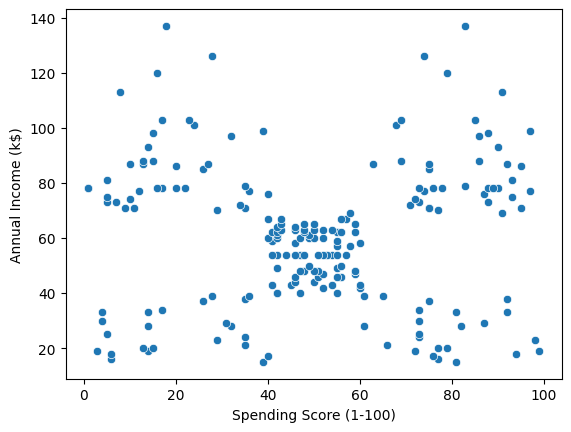

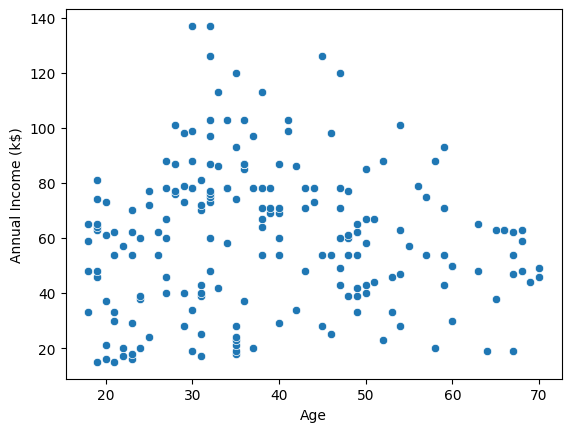

In [22]:
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",data=x)
plt.show()
#or
sns.scatterplot(x="Age",y="Annual Income (k$)",data=y)
plt.show()

In [23]:
ssex=[]
for i in range(1,10):
    modelx=KMeans(n_clusters=i)
    modelx.fit(x)
    ssex.append(modelx.inertia_)
#or
ssey=[]
for i in range(1,10):
    modely=KMeans(n_clusters=i)
    modely.fit(y)
    ssey.append(modely.inertia_)

/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/si

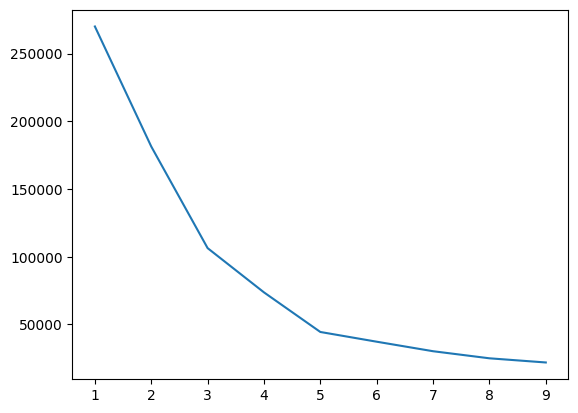

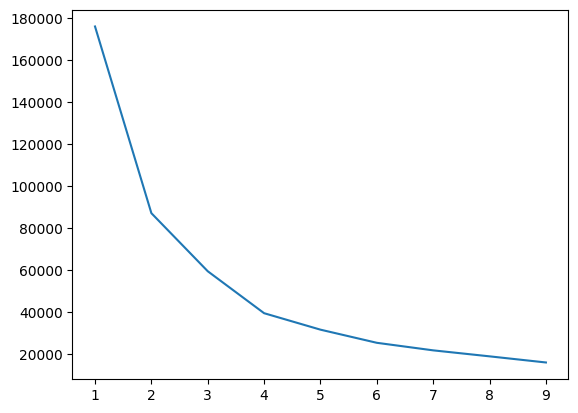

In [24]:
plt.plot(range(1,10),ssex)
plt.show()
plt.plot(range(1,10),ssey)
plt.show()

In [25]:
modelx=KMeans(n_clusters=5)
modelx.fit(x)
modely=KMeans(n_clusters=4)
modely.fit(y)

/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [26]:
x['Category']=modelx.labels_
y['Category']=modely.labels_

/tmp/ipykernel_17498/1951528269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Category']=modelx.labels_
/tmp/ipykernel_17498/1951528269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Category']=modely.labels_


In [27]:
x

,Annual Income (k$),Spending Score (1-100),Category
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


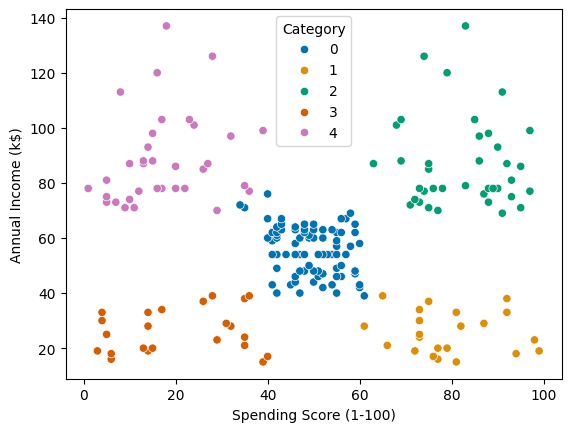

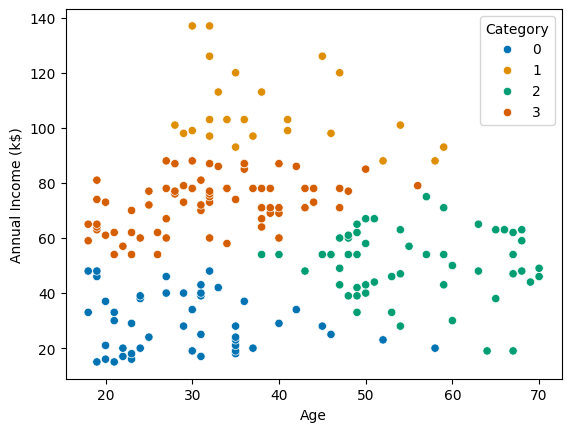

In [28]:
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",hue="Category",data=x,palette="colorblind")
plt.show()
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Category",data=y,palette="colorblind")
plt.show()